## Análise Exploratória - Application - Credit Bank Score

### Análise de Application:
  - Uma fintech em crescimento, onde estão recebendo clientes desbancarizados (Application).
  - Objetivo do Projeto: qual tipo de cliente iremos concender o crédito? Qual é mais arriscado? Quem pode se tornar cliente?
  - Público (Tabela: Application), onde o público pode ser mapeado pelo SK_ID_CURR
  - Como as outras veriáveis estão interferindo para o SK_ID_CURR ser Adimplente ou Inadimplente

### Importar bibliotecas:

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Mapear nosso Google Drive
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#Carregando a base:
application = pd.read_csv('/content/gdrive/MyDrive/PoD Academy/2. Modulo Tecnologia e Programação/Projeto - EDA - Credito Application/application_train.csv')

## Análise Univariada
  - Olhar variáveis indidualmente

### Primeira visualizações

In [ ]:
#Avaliar as dimensões da base:
application.shape

(307511, 122)

In [ ]:
#Visualização inicial da tabela:
application.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

### Metadados

In [ ]:
# Criar variável para metadados
# (nomes das colunas, tipos, quantidade de nulos, percentual de nulos, cardinalidade)

def generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata = metadata.sort_values(by='tipo')
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
generate_metadata(application)

nome_variavel    tipo  qt_nulos  percent_nulos  \
0                    SK_ID_CURR   int64         0           0.00   
1              FLAG_CONT_MOBILE   int64         0           0.00   
2                    FLAG_PHONE   int64         0           0.00   
3                    FLAG_EMAIL   int64         0           0.00   
4               FLAG_DOCUMENT_9   int64         0           0.00   
..                          ...     ...       ...            ...   
117             OCCUPATION_TYPE  object     96391          31.35   
118  WEEKDAY_APPR_PROCESS_START  object         0           0.00   
119           ORGANIZATION_TYPE  object         0           0.00   
120             NAME_TYPE_SUITE  object      1292           0.42   
121          WALLSMATERIAL_MODE  object    156341          50.84   

     cardinalidade  
0           307511  
1                2  
2                2  
3                2  
4                2  
..             ...  
117             18  
118              7  
119             58  
120              7  
121              7  

[122 rows x 5 columns]

### Análise Estatística:

In [ ]:
application.describe().round(1)

SK_ID_CURR    TARGET  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
count    307511.0  307511.0      307511.0          307511.0    307511.0   
mean     278180.5       0.1           0.4          168797.9    599026.0   
std      102790.2       0.3           0.7          237123.1    402490.8   
min      100002.0       0.0           0.0           25650.0     45000.0   
25%      189145.5       0.0           0.0          112500.0    270000.0   
50%      278202.0       0.0           0.0          147150.0    513531.0   
75%      367142.5       0.0           1.0          202500.0    808650.0   
max      456255.0       1.0          19.0       117000000.0   4050000.0   

       AMT_ANNUITY  AMT_GOODS_PRICE  REGION_POPULATION_RELATIVE  DAYS_BIRTH  \
count     307499.0         307233.0                    307511.0    307511.0   
mean       27108.6         538396.2                         0.0    -16037.0   
std        14493.7         369446.5                         0.0      4364.0   
min         1615.5          40500.0                         0.0    -25229.0   
25%        16524.0         238500.0                         0.0    -19682.0   
50%        24903.0         450000.0                         0.0    -15750.0   
75%        34596.0         679500.0                         0.0    -12413.0   
max       258025.5        4050000.0                         0.1     -7489.0   

       DAYS_EMPLOYED  ...  FLAG_DOCUMENT_18  FLAG_DOCUMENT_19  \
count       307511.0  ...          307511.0          307511.0   
mean         63815.0  ...               0.0               0.0   
std         141275.8  ...               0.1               0.0   
min         -17912.0  ...               0.0               0.0   
25%          -2760.0  ...               0.0               0.0   
50%          -1213.0  ...               0.0               0.0   
75%           -289.0  ...               0.0               0.0   
max         365243.0  ...               1.0               1.0   

       FLAG_DOCUMENT_20  FLAG_DOCUMENT_21  AMT_REQ_CREDIT_BUREAU_HOUR  \
count          307511.0          307511.0                    265992.0   
mean                0.0               0.0                         0.0   
std                 0.0               0.0                         0.1   
min                 0.0               0.0                         0.0   
25%                 0.0               0.0                         0.0   
50%                 0.0               0.0                         0.0   
75%                 0.0               0.0                         0.0   
max                 1.0               1.0                         4.0   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count                   265992.0                    265992.0   
mean                         0.0                         0.0   
std                          0.1                         0.2   
min                          0.0                         0.0   
25%                          0.0                         0.0   
50%                          0.0                         0.0   
75%                          0.0                         0.0   
max                          9.0                         8.0   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_QRT  \
count                   265992.0                   265992.0   
mean                         0.3                        0.3   
std                          0.9                        0.8   
min                          0.0                        0.0   
25%                          0.0                        0.0   
50%                          0.0                        0.0   
75%                          0.0                        0.0   
max                         27.0                      261.0   

       AMT_REQ_CREDIT_BUREAU_YEAR  
count                    265992.0  
mean                          1.9  
std                           1.9  
min                           0.0  
25%                           0.0  
50%           

## Análise de Variáveis Numéricas:

In [ ]:
def boxplots_var_num(dataframe):
    """
    Plota boxplots para todas as variáveis numéricas do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os boxplots serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota boxplots para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.boxplot(data=dataframe[column], ax=axes[i//3, i%3], color="skyblue")
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('')

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Boxplots", fontsize=20, fontweight='bold', y=1.00)

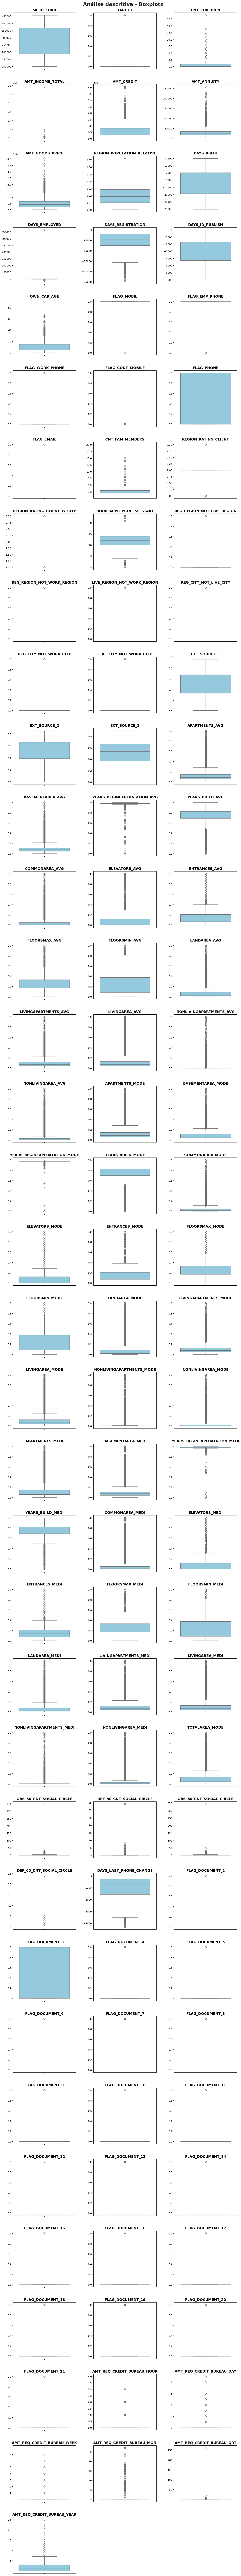

In [ ]:
boxplots_var_num(application)

- A variáveis Days_Employed conta com o valor 365243 que correspondem as pessoas aposentadas e desempregadas.

In [ ]:
# application_00['DAYS_EMPLOYED'].value_counts().sort_values()
# application_00['DAYS_EMPLOYED'][application_00['DAYS_EMPLOYED'] > 0].value_counts().sort_values()
# application_00[application_00['DAYS_EMPLOYED'] == 365243].head(30)
# application_00[application_00['DAYS_EMPLOYED'] == 365243].shape
# application_00[application_00['NAME_INCOME_TYPE'] == 'Pensioner'].head(20)
# print(application_00[application_00['NAME_INCOME_TYPE'] == 'Pensioner'].shape)
# application_00[(application_00['DAYS_EMPLOYED'] == 365243) & (application_00['NAME_INCOME_TYPE'] != 'Pensioner')].head(16)
# print(application_00[application_00['NAME_INCOME_TYPE'] == 'Unemployed'].shape)

### Histogramas:

In [ ]:
def histograms_var_num(dataframe):
    """
    Plota histogramas corrigidos com a curva KDE (Kernel Density Estimation) para todas as variáveis numéricas
    do dataframe fornecido em um painel com 3 gráficos por linha.

    :param dataframe: DataFrame para o qual os histogramas serão gerados.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota histogramas com KDE para cada coluna numérica
    for i, column in enumerate(numeric_columns):
        sns.histplot(data=dataframe[column], ax=axes[i//3, i%3], color="purple", bins=30, kde=True)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Frequência')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Histograma com KDE", fontsize=20, fontweight='bold', y=1.00)

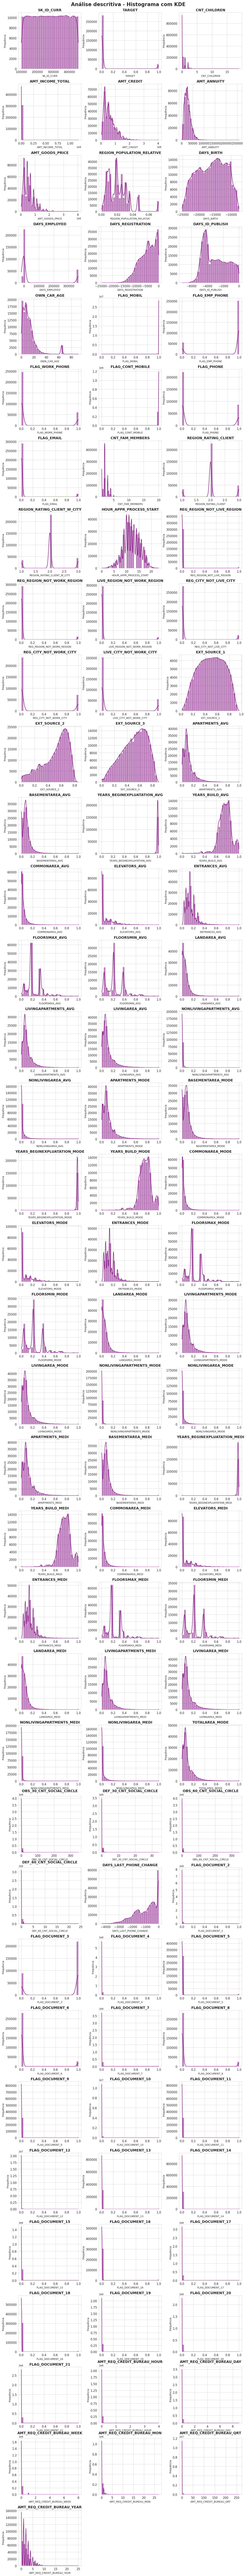

In [ ]:
histograms_var_num(application)

### Análise Variáveis Categóricas

  - Graficos de Barra

In [ ]:
def plot_categorical_frequency_pt(df, corte_cardinalidade=30, graficos_por_linha=2):
    """
    Plota a frequência de categorias para variáveis categóricas em um DataFrame.

    Parâmetros:
    - df: DataFrame para plotagem.
    - corte_cardinalidade: Cardinalidade máxima para uma coluna ser considerada (padrão é 30).
    - graficos_por_linha: Quantidade de gráficos por linha (padrão é 3).

    Retorna:
    - Exibe os gráficos de barras.
    """

    # Gera metadados para o DataFrame
    metadados = []
    for coluna in df.columns:
        metadados.append({
            'Variável': coluna,
            'Tipo': df[coluna].dtype,
            'Cardinalidade': df[coluna].nunique()
        })

    df_metadados = pd.DataFrame(metadados)

    # Filtra colunas com cardinalidade maior que o corte e tipos não numéricos
    variaveis_categoricas = df_metadados[(df_metadados['Cardinalidade'] <= corte_cardinalidade) & (df_metadados['Tipo'] == 'object')]

    # Calcula o número de linhas e colunas para os subplots
    n_linhas = -(-len(variaveis_categoricas) // graficos_por_linha)  # Ceiling division
    n_colunas = min(len(variaveis_categoricas), graficos_por_linha)

    # Plota as variáveis categóricas
    fig, axs = plt.subplots(nrows=n_linhas, ncols=n_colunas, figsize=(12, 4 * n_linhas))

    for i, (idx, linha) in enumerate(variaveis_categoricas.iterrows()):
        var = linha['Variável']
        ax = axs[i // graficos_por_linha, i % graficos_por_linha]
        df[var].value_counts().sort_index().plot(kind='bar', ax=ax, color='lightgreen')
        ax.set_title(f'Frequência em {var}')
        ax.set_ylabel('Frequência')
        ax.set_xlabel(var)

    # Remove os eixos vazios, se houver
    for j in range(i + 1, n_linhas * n_colunas):
        axs[j // graficos_por_linha, j % graficos_por_linha].axis('off')

    plt.tight_layout()
    plt.show()

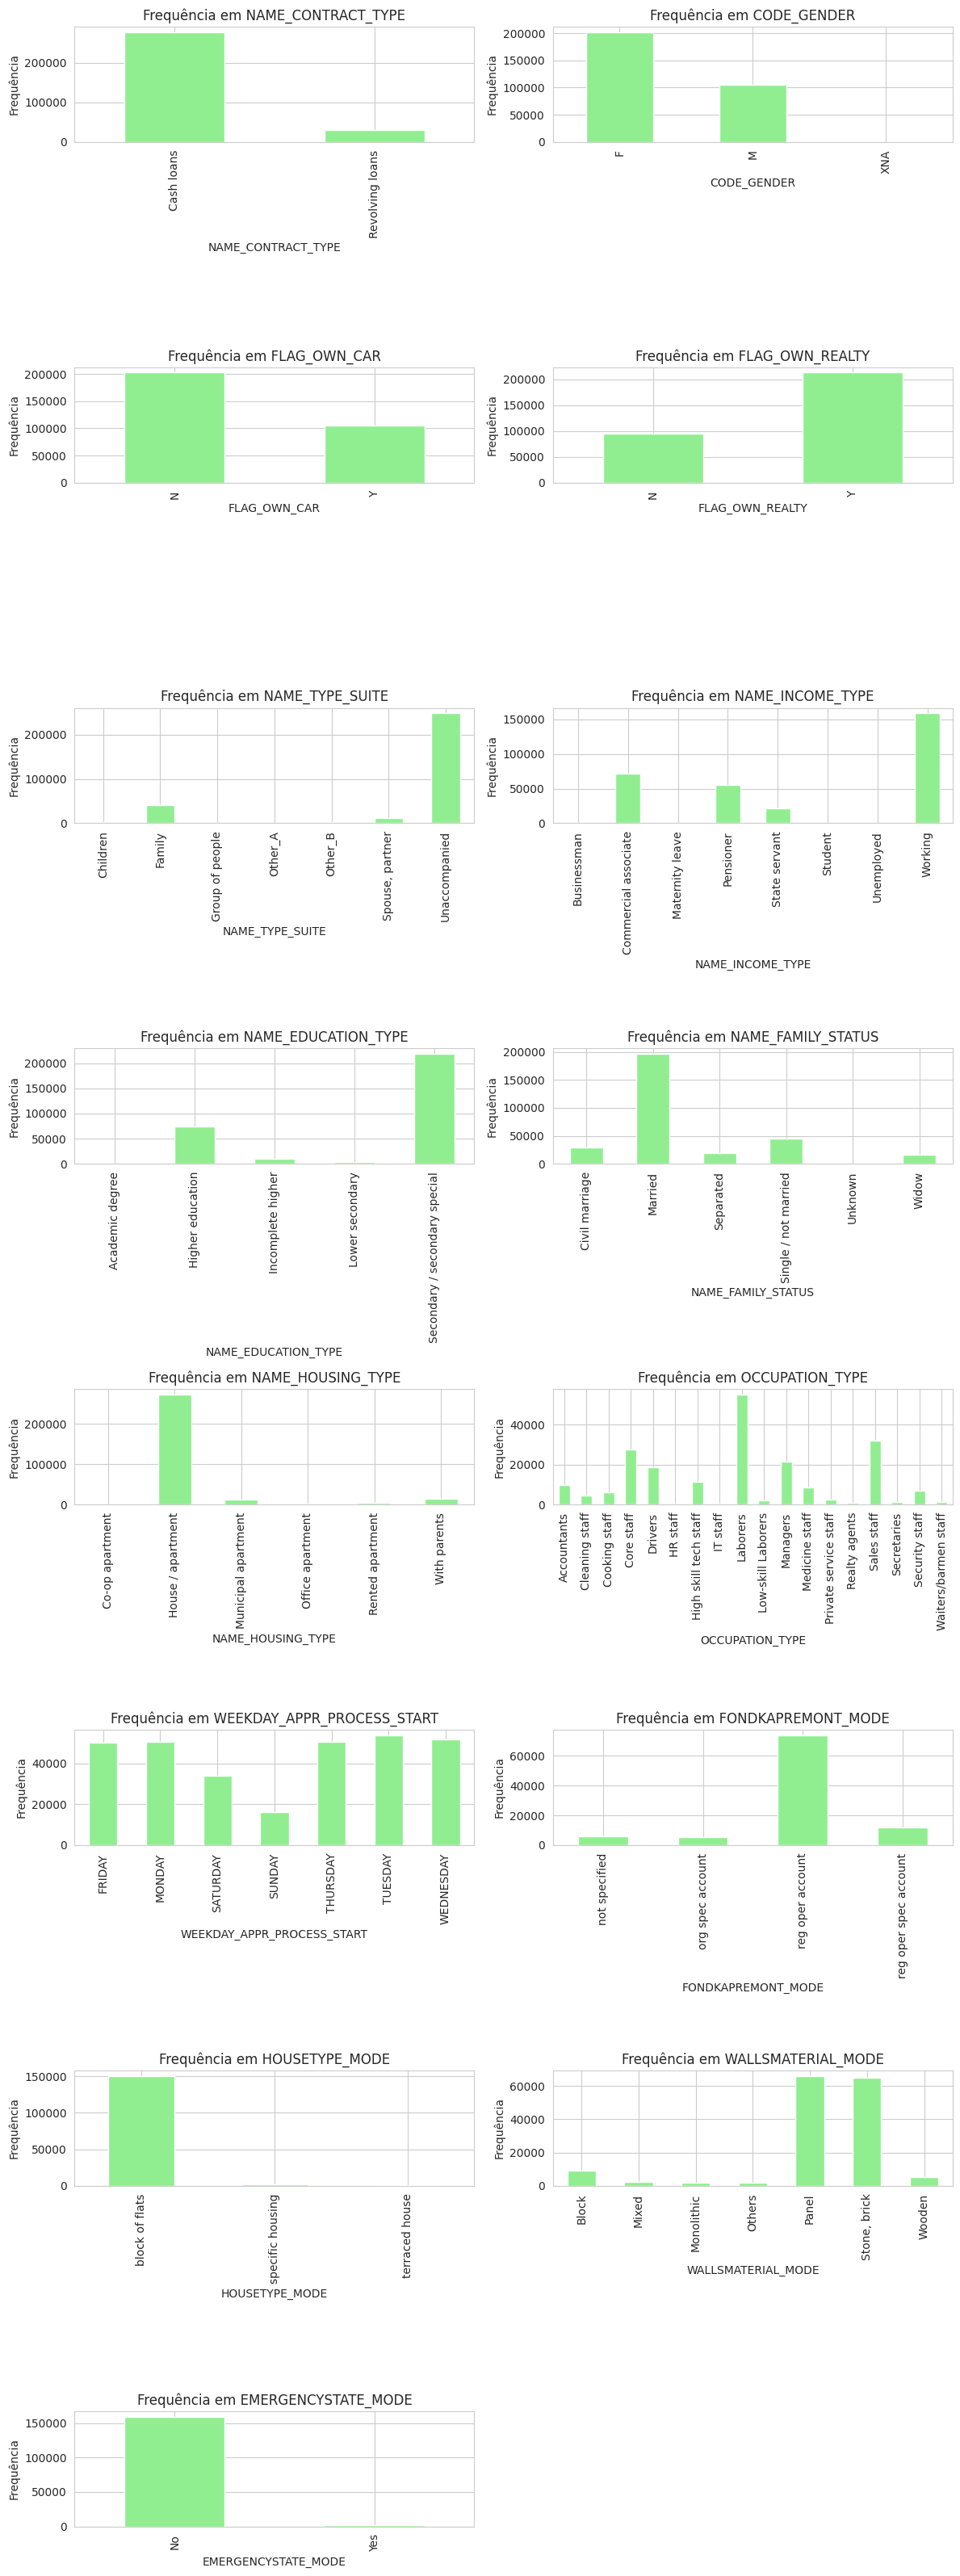

In [ ]:
plot_categorical_frequency_pt(application)

### **Análise multivariada (olhar a relação entre variáveis)**
KdePlots

In [ ]:
def kdeplots_var_num_target(dataframe, target_column):
    """
    Plota gráficos kdeplot (Kernel Density Estimation) para todas as variáveis numéricas do DataFrame,
    discriminando as curvas de acordo com o valor da coluna target.

    :param dataframe: DataFrame contendo as variáveis numéricas e a coluna target.
    :param target_column: Nome da coluna target.
    """
    # Seleciona apenas colunas numéricas
    numeric_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns

    # Define o número de linhas com base no número de colunas numéricas
    nrows = len(numeric_columns) // 3 + (len(numeric_columns) % 3 > 0)

    # Inicializa o painel de gráficos
    fig, axes = plt.subplots(nrows=nrows, ncols=3, figsize=(14, nrows * 4))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Configura estilo e paleta de cores
    sns.set_style("whitegrid")

    # Plota kdeplots para cada coluna numérica, discriminando as curvas pelo valor da coluna target
    for i, column in enumerate(numeric_columns):
        sns.kdeplot(data=dataframe[dataframe[target_column] == 1][column], ax=axes[i//3, i%3], color="red", label="1", fill=True, warn_singular=False)
        sns.kdeplot(data=dataframe[dataframe[target_column] == 0][column], ax=axes[i//3, i%3], color="blue", label="0", fill=True, warn_singular=False)
        axes[i//3, i%3].set_title(f'{column}', fontdict={'fontsize': 14, 'fontweight': 'bold'})
        axes[i//3, i%3].set_ylabel('Densidade')
        axes[i//3, i%3].tick_params(axis='both', which='major', labelsize=12)
        if i == 0:
            axes[i//3, i%3].legend(title=target_column)

    # Remove gráficos vazios (se houver)
    for j in range(i+1, nrows*3):
        fig.delaxes(axes.flatten()[j])

    # Adiciona título principal
    fig.suptitle("Análise descritiva - Gráfico KDE por Target", fontsize=20, fontweight='bold', y=1.00)

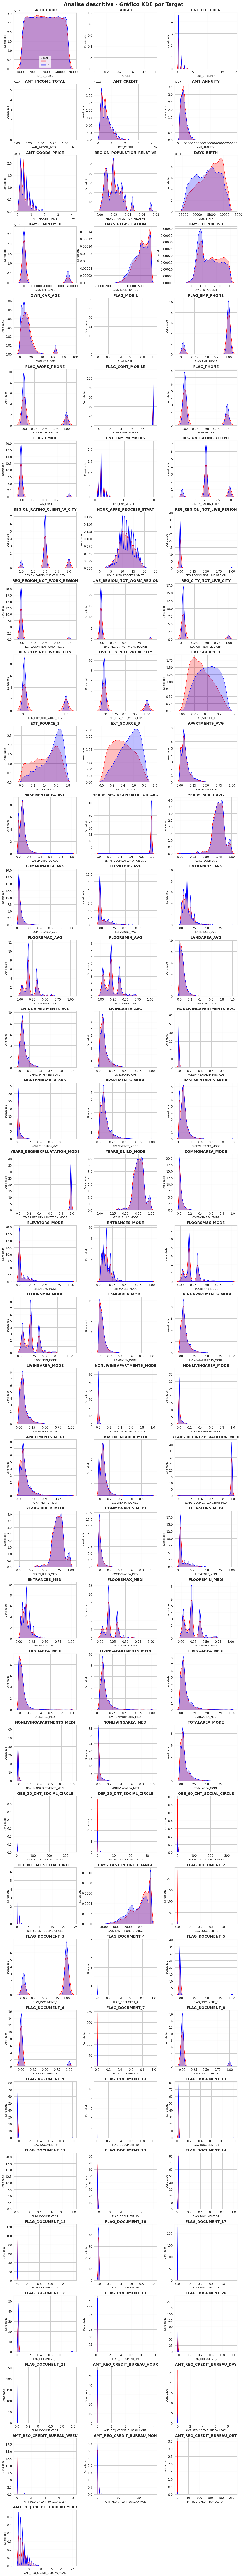

In [ ]:
kdeplots_var_num_target(application, 'TARGET')

#### **Análise variáveis categóricas**
  - ##### **Gráficos de barras segmentado**

In [ ]:
def plot_cat_vs_target_cutoff(dataframe, target_column, cutoff=10):
    """
    Plota gráficos de barras para analisar as variáveis categóricas em relação ao target,
    limitando o número de variáveis de acordo com um valor de cutoff.

    :param dataframe: DataFrame contendo as variáveis categóricas e a coluna target.
    :param target_column: Nome da coluna target.
    :param cutoff: Valor de cutoff para limitar o número de variáveis categóricas plotadas (padrão é 10).
    """
    # Seleciona apenas colunas categóricas
    categorical_columns = dataframe.select_dtypes(include=['object', 'category']).columns

    # Filtra as colunas com base no cutoff
    categorical_columns_filtered = [col for col in categorical_columns if dataframe[col].nunique() <= cutoff]

    # Define o número de linhas e colunas para os subplots
    n_rows = len(categorical_columns_filtered) // 3 + (len(categorical_columns_filtered) % 3 > 0)
    n_cols = min(len(categorical_columns_filtered), 3)

    # Cria subplots
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))

    # Ajusta o layout
    plt.tight_layout(pad=4)

    # Loop pelas colunas categóricas filtradas
    for i, column in enumerate(categorical_columns_filtered):
        # Calcula proporções de cada categoria para cada valor do target
        prop_df = (dataframe.groupby([column, target_column]).size() / dataframe.groupby(target_column).size()).unstack()

        # Plota o gráfico de barras
        ax = axes[i // n_cols, i % n_cols] if n_rows > 1 else axes[i]
        prop_df.plot(kind='bar', stacked=True, ax=ax)
        ax.set_title(column, fontsize=14)
        ax.set_ylabel('Proporção')
        ax.tick_params(axis='both', which='major', labelsize=12)

        # Rotaciona as labels do eixo x
        ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

        # Ajusta o layout do subplot
        plt.subplots_adjust(wspace=0.5, hspace=0.7)

    # Remove subplots vazios
    for j in range(len(categorical_columns_filtered), n_rows * n_cols):
        if n_rows > 1:
            fig.delaxes(axes.flatten()[j])
        else:
            fig.delaxes(axes)

    # Adiciona título principal
    fig.suptitle("Análise de Variáveis Categóricas em relação ao Target", fontsize=20, fontweight='bold', y=1.02)

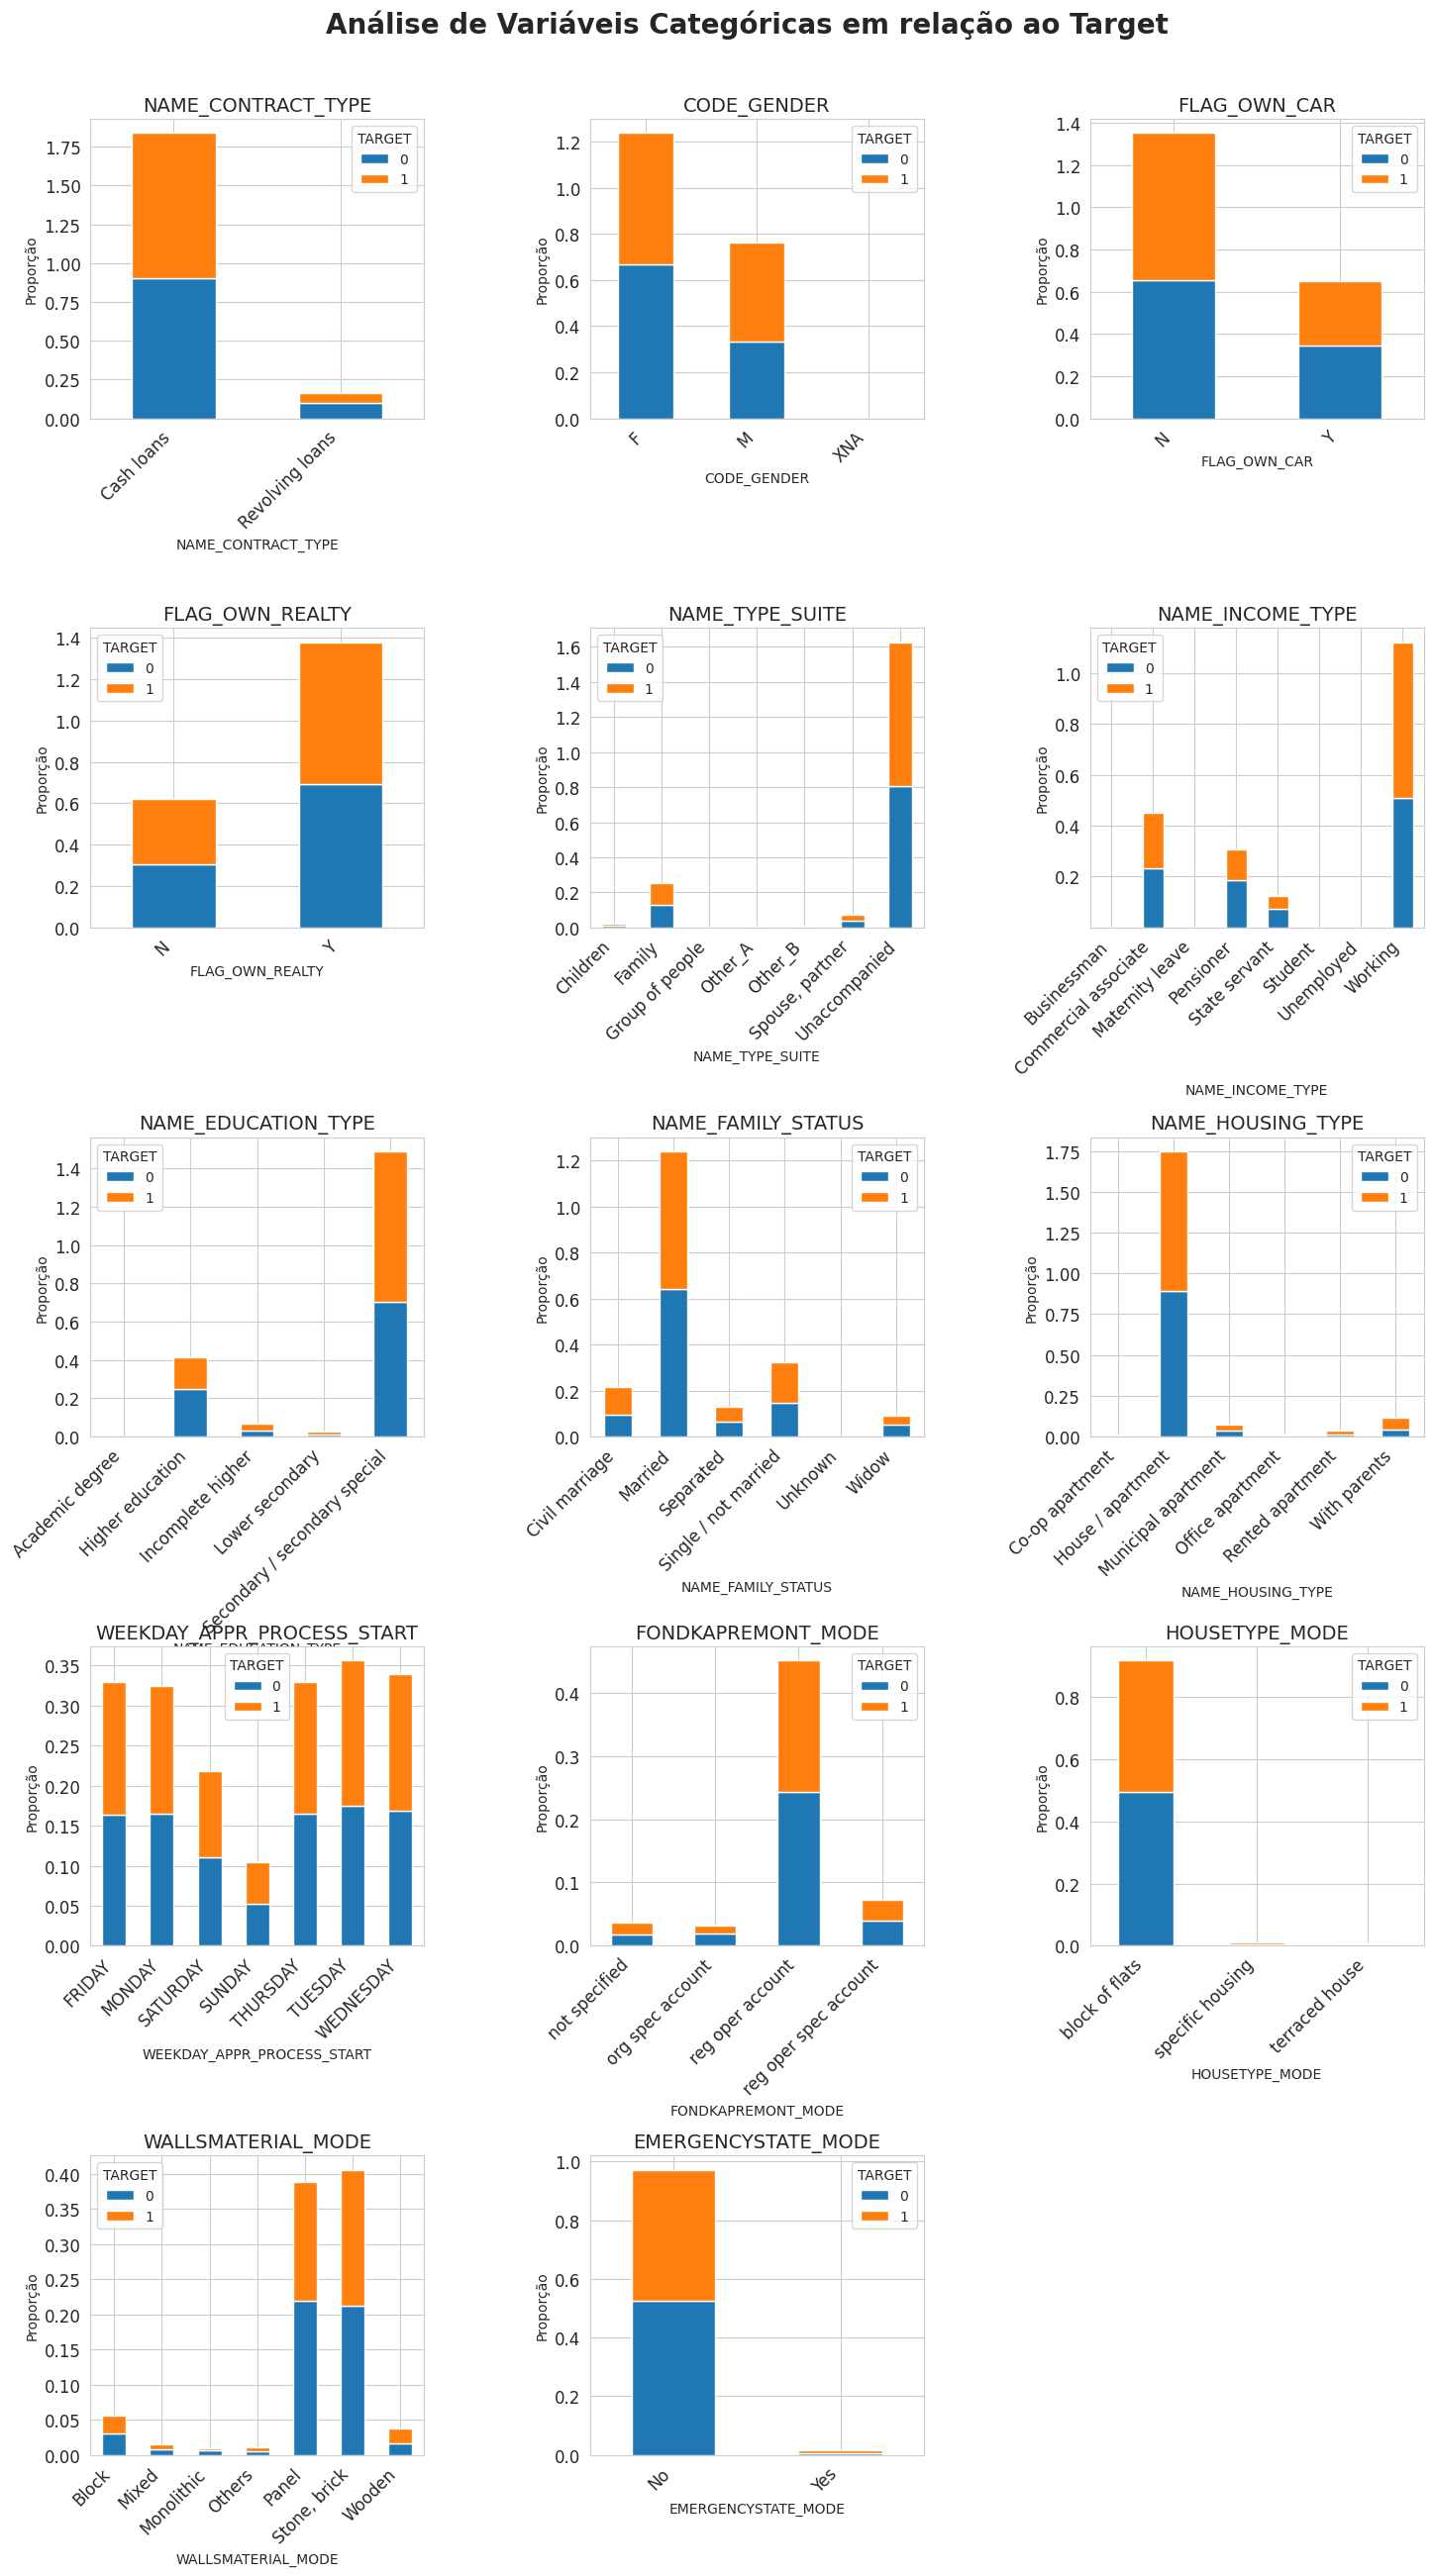

In [ ]:
# Exemplo de uso
plot_cat_vs_target_cutoff(application, 'TARGET', cutoff=8)
plt.show()

In [ ]:

score_1= application.EXT_SOURCE_1.round(1).value_counts().sort_index()

score_1

EXT_SOURCE_1
0.0      374
0.1     5488
0.2    13240
0.3    17565
0.4    19353
0.5    19828
0.6    19905
0.7    18944
0.8    14736
0.9     4698
1.0        2
Name: count, dtype: int64

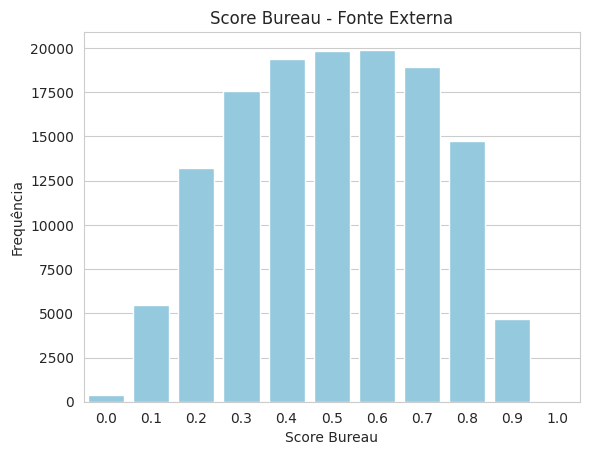

In [ ]:
#plotar grafico de barras do score_1
sns.barplot(x=score_1.index, y=score_1.values, color='skyblue')
plt.title('Score Bureau - Fonte Externa')
plt.xlabel('Score Bureau')
plt.ylabel('Frequência')
plt.show()

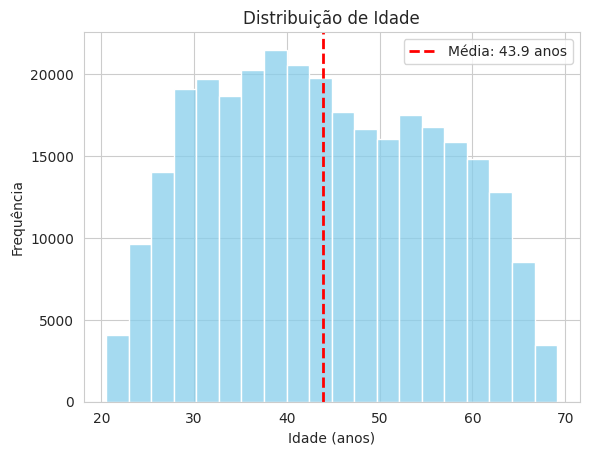

In [ ]:
#Transformação coluna idade

idade = application['DAYS_BIRTH'] / -365
idade.describe().round(0)
# Plotar o histograma da idade
sns.histplot(idade, bins=20, color='skyblue')

# Calcular a média
media_idade = idade.mean()

# Inserir a linha da média
plt.axvline(media_idade, color='red', linestyle='dashed', linewidth=2, label=f'Média: {media_idade:.1f} anos')

# Adicionar título e rótulos
plt.title('Distribuição de Idade')
plt.xlabel('Idade (anos)')
plt.ylabel('Frequência')
plt.legend()
plt.show()